# Outline

1. Descriptive Statistics
    * Mean
    * Median
    * Mode
    * Variance and Standard Deviation
2. Inferential Statistics
    * Central Limit Theorem 
    * Confidence Intervals
    * Hypothesis Testing


### Recap on Statistics
Statistics is the practice of collecting and analyzing data to discover findings that
are useful or predict what causes those findings to happen. Probability often plays
a large role in statistics, as we use data to estimate how likely an event is to
happen.

Statistics is the heart of many data-driven innovations. Machine learning in itself is a statistical tool, searching for possible hypotheses to correlate relationships between different variables in data.

In this section we will cover the fundamentals of statistics and hypothesis testing.
Starting with descriptive statistics, we will learn common ways to summarize
data. After that, we will venture into inferential statistics, where we try to
uncover attributes of a population based on a sample.

#### 1. Descriptive Statistics
This is the area most people are familiar with. It cuts across mean, median, and mode followed by variance, standard deviation and normal distribution.

* Mean and Weighted Mean

The mean is the average of a set of values. It is simply the sum of the values which is divided by the number of values. Mean is calculated the same way for both populations and samples. Below is a calculation of mean in python.

In [12]:
# Calculating the mean in python

samples = [21, 28, 34, 39, 44, 22, 28, 34, 39, 44, 24, 28, 24, 28, 23, 29, 24, 44, 22, 26]

mean = sum(samples)/len(samples)

print(mean)

30.25


There are two versions of the mean you will see: the sample mean ¯x and the
population mean μ as expressed here:

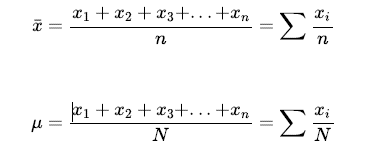

Both ¯x and μ are
the same calculation, just different names depending on whether it’s a sample or
population we are working with.

The mean is likely familiar to you, but here’s something less known about the
mean: the mean is actually a weighted average called the $weighted$ $mean$.

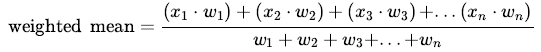

In [13]:
# Calculating a weighted mean in Python
# Three exams of .20 weight each and final exam of .40 weight
sample = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]

weighted_mean = sum(s * w for s, w in zip(sample, weights)) / sum(weights)

print(weighted_mean) # prints 81.4

81.4


* Median

The median is the middlemost value in a set of ordered values. The values are sequentially ordered and the median will be the centermost values.

In [14]:
# Calculating the median in python

# No of pets each person owns
#sample = [0, 1, 5, 7, 9, 10, 14, 12]

# Defining a function for the execution of the median
def median(values):
    ordered = sorted(values) # Values are sorted 
    print('The sorted values: \n', ordered)
    print()
    
    # Getting the length of the arrays
    n = len(ordered)
    
    # Solving for the middle number
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n/2)
    
    # Conditional evaluation 
    if n % 2 == 0:
        return (ordered[mid] + ordered[mid+1]) / 2.0
    else:
        return ordered[mid]
    
print('The median is: ', median(samples)) # prints 7

The sorted values: 
 [21, 22, 22, 23, 24, 24, 24, 26, 28, 28, 28, 28, 29, 34, 34, 39, 39, 44, 44, 44]

The median is:  28.0


In [15]:
28+28

56

The median is actually the 50% quantile, or the value where 50% of ordered values are behind it

* Mode

The mode is the most frequently occurring set of values. It primarily becomes useful when your data is repetitive and you want to find which values occur the most frequently.

When no value occurs more than once, there is no mode. When two values occur with an equal amount of frequency, then the dataset is considered $bimodal$.

In [21]:
a = range(0, 13)

In [24]:
mult_2 = lambda y: y*2

In [25]:
for _ in a:
    print(_,'x 2 =',mult_2(_))

0 x 2 = 0
1 x 2 = 2
2 x 2 = 4
3 x 2 = 6
4 x 2 = 8
5 x 2 = 10
6 x 2 = 12
7 x 2 = 14
8 x 2 = 16
9 x 2 = 18
10 x 2 = 20
11 x 2 = 22
12 x 2 = 24


In [ ]:
counts = {values: counts,
          0: 1, 
         1: 1,
         3: 2,
         2: 2,
         }

In [23]:
# Calculating the mode in Python
from collections import defaultdict

#sample = [1, 2, 5, 7, 0, 2, 3]

def mode(values):
    counts = defaultdict(lambda: 0)
    
    for s in values:
        counts[s] += 1
        
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print(mode(samples)) # [2, 3]

[28]


In practicality, the mode is not used a lot unless your data is repetitive. This is commonly encountered with integers, categories, and other discrete variables.

In [12]:
help(defaultdict)

Help on class defaultdict in module collections:

class defaultdict(builtins.dict)
 |  defaultdict(default_factory=None, /, [...]) --> dict with default factory
 |  
 |  The default factory is called without arguments to produce
 |  a new value when a key is not present, in __getitem__ only.
 |  A defaultdict compares equal to a dict with the same items.
 |  All remaining arguments are treated the same as if they were
 |  passed to the dict constructor, including keyword arguments.
 |  
 |  Method resolution order:
 |      defaultdict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      D.copy() -> a shallow copy of D.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __missing__(...)
 |      __missing__(key) # Called by __getitem__ for missing key; pseudo-code:
 |      if self.defau

* Variance and Standard Deviation

When we start talking about variance and standard deviation, this is where it gets interesting. One thing that confuses people with variance and standard deviation is there are some calculation differences for the sample versus the population. I will do my best to cover these differences clearly.

Let’s say I’m interested in studying the number of pets owned by members of my work staff (note that I’m defining this as my population, not a sample). I have seven people on my staff.

I take the mean of all the numbers of pets they own, and I get 6.571. Let’s subtract this mean from each value. This will show us how far each value is from the mean as shown in the table below;

|Value|Mean|Difference|
|--|--|--|
|0|6.571|-6.571|
|1|6.571|-5.571|
|5|6.571|-1.571|
|7|6.571|0.429|
|9|6.571|2.429|
|10|6.571|3.429|
|14|6.571|7.429|

In visualizing  the data on a number line with the mean indicated as 'X' is given as;
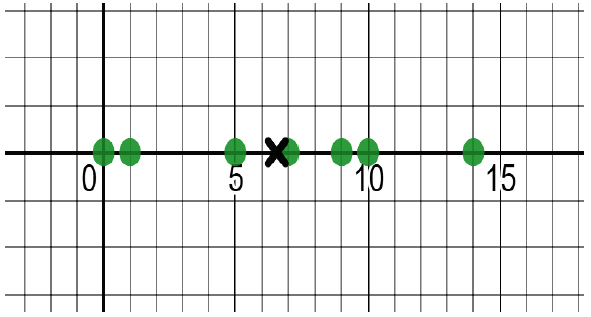

The differences give us a sense of how spread out the data is and how far values are from the mean. We can think of a way to consolidate this spread into a single number by quickly considering the average of the differenece. 

But an even approach to this would be squaring the differences of the spread before taking the average. This will handle the following limitations;
- Removes negative values
- Amplifiers the larger differences for it to be easier to work with.

The average squares of the differences will then give the $variance$. This gives us the measure of how our data is spread; The mathematically formular is given as;

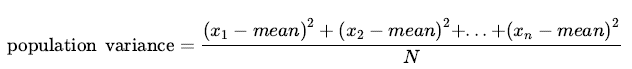

More formally, the varaince is given as;

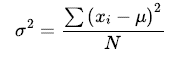

In [25]:
len(samples)

20

In [26]:
# Calculating variance in Python
#data = [0, 1, 5, 7, 9, 10, 14]

def variance(values):
    mean = sum(values) / len(values)
    
    _variance = sum((v - mean) ** 2 for v in values) / len(values)
    return _variance

print(variance(samples))

58.9875


So the variance for number of pets owned by my office staff is $21.387755$. But what does it exactly mean? It’s reasonable to conclude that a higher variance means more spread, but how do we relate this back to our data? This number is larger than any of our observations because we did a lot squaring and summing, putting it on an entirely different metric. So how do we squeeze it back down so it’s back on the scale we started with?


The opposite of a square is a square root, so let’s take the square root of the variance, which gives us the $standard$ $deviation$. This is the variance scaled into a number expressed in terms of “number of pets,” which makes it a bit more
meaningful:
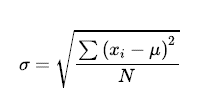

In [28]:
samples

[21,
 28,
 34,
 39,
 44,
 22,
 28,
 34,
 39,
 44,
 24,
 28,
 24,
 28,
 23,
 29,
 24,
 44,
 22,
 26]

In [27]:
# Calculating standard deviation in Python
from math import sqrt

# Number of pets each person owns
data = [0, 1, 5, 7, 9, 10, 14]

def variance(values):
    mean = sum(values) / len(values)
    _variance = sum((v - mean) ** 2 for v in values) / len(values)
    return _variance

def std_dev(values):
    return sqrt(variance(values))


print(std_dev(samples)) 

7.680332024072918


You will see our standard deviation is approximately 4.62 pets. So we can express our spread on a scale we started with, and this makes our variance a bit easier to interpret.

* The Normal Distribution

The $normal$ $distribution$, also known as the $Gaussian$ $distribution$, is a symmetrical bell-shaped distribution that has most mass around the mean, and its spread is defined as a standard deviation. The “tails” on either side become thinner as you move away from the mean.
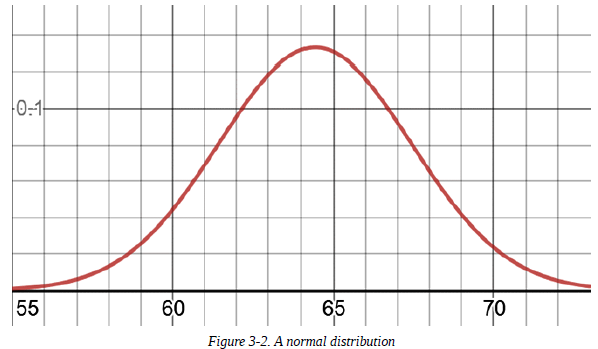

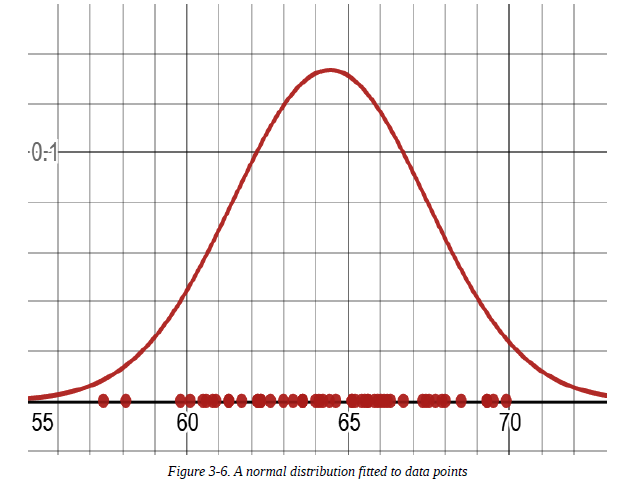

The standard deviation plays an important role in the normal distribution, because it defines how “spread out” it is. It is actually one of the parameters alongside the mean. The $probability$ $density$ $function$ $(PDF)$ that creates the normal distribution is as follows:
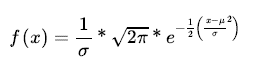

In [38]:
# The normal distribution function in Python
def normal_pdf(x: float, mean: float, std_dev: float):
    
    return (1.0 / (2.0 * math.pi * std_dev ** 2) ** 0.5) * math.exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))

#### 2. Inferential Statistics

Descriptive statistics, which we have covered so far, is commonly understood. However, when we get into inferential statistics the abstract relationships between sample and population come into full play. These abstract nuances are not something you want to rush through but rather take your time and absorb thoughtfully.

As stated earlier, we are wired as humans to be biased and quickly
come to conclusions. Being a good data science professional requires you to suppress that primal desire and consider the possibility that other explanations can exist.

First let’s start with the theorem that lays the foundation for all inferential statistics.

* The Central Limit Theorem

The central limit theorem helps to put a population which is not in a normal distribution into a normal distribution. 

In [47]:
len([sum([random.uniform(0.0, 1.0) for i in range(31)])/31 for _ in range(1000)])

1000

In [52]:
help(random.uniform)

Help on method uniform in module random:

uniform(a, b) method of random.Random instance
    Get a random number in the range [a, b) or [a, b] depending on rounding.



In [53]:
# Exploring the central limit theorem in Python
# Samples of the uniform distribution will average out to a normal distribution.

import random
import plotly.express as px

sample_size = 31
sample_count = 1000

# Central limit theorem, 1000 samples each with 31
# random numbers between 0.0 and 1.0
x_values = [(sum([random.uniform(0.0, 1.0) for i in range(sample_size)]) / sample_size) for _ in range(sample_count)]

y_values = [1 for _ in range(sample_count)]
px.histogram(x=x_values, y = y_values, nbins=20).show()

Here’s what is happening. The individual numbers in the samples alone will not create a normal distribution. The distribution will be flat where any number is equally likely (known as a uniform distribution). But when we group them as samples and average them, they form a normal distribution.

* Confidence Intervals

It is the range of calculation showing how confidently we believe a sample mean (or other parameter) falls in a range for the population mean.

Based on a sample of 31 golden retrievers with a sample mean of 64.408 and a sample standard deviation of 2.05, I am 95% confident that the population mean lies between 63.686 and 65.1296.

How do I achieve this fit???

Don't be confused, lol...

First, I start by choosing a $level$ $of$ $confidence$ $(LOC)$, which should contain the desired probability for the population mean range. I want to be 95% confident that my sample mean falls in the population mean range I will calculate.

We can leverage on the z-value which is the symmetrical range in the standard normal distribution that will give 95% probability in the center. In calculating the symmetrical values, we make use of the Cummulative Density Function (CDF). 

Logically, to get 95% of the symmetrical area in the center, we would chop off the tails that have the remaining 5% of area. Splitting that remaining 5% area in half would give us 2.5% area in each tail. Therefore, the areas we want to look up the x-values for are .025 and .975

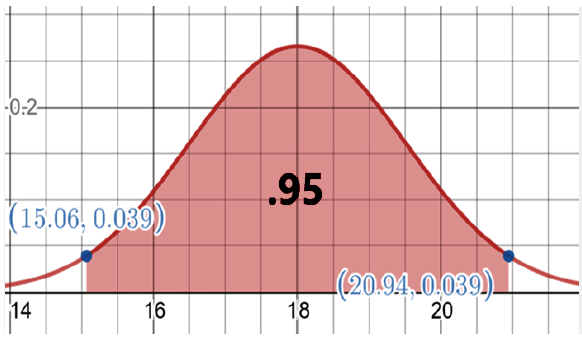

We can look up the x-value for area .025 and the x-value for area .975, and that will give us our center range containing 95% of the area.

In [68]:
# Retrieving a critical z-value
from scipy.stats import norm
import math

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

print(critical_z_value(p=0.95))
# (-1.959963984540054, 1.959963984540054)

(-1.959963984540054, 1.959963984540054)


OK, so we get ±1.95996, which is our critical z-value capturing 95% of
probability at the center of the standard normal distribution.

Next, I’m going to leverage the central limit theorem to produce the margin of error (E), which is the range around the sample mean that contains the population mean at that level of confidence.

Recall that our sample of 31 golden retrievers has a mean of 64.408 and standard deviation of 2.05. The formula to get this margin of error is: 
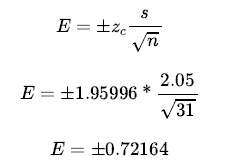

If we apply that margin of error against the sample mean, we finally get the confidence interval!
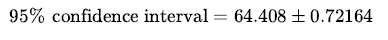

In [71]:
# Calculating a confidence interval in Python
from math import sqrt
from scipy.stats import norm

def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0 - p) / 2.0
    upper_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30
    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci


print(confidence_interval(p=.95, sample_mean=64.408, sample_std=2.05, n=31))
# (63.68635915701992, 65.12964084298008)

(63.68635915701992, 65.12964084298008)


So the way to interpret this is “based on my sample of 31 golden retriever weights with sample mean 64.408 and sample standard deviation of 2.05, I am 95% confident the population mean lies between 63.686 and 65.1296.” That is how we describe our confidence interval.

* Hypothesis Testing

Past studies have shown that the mean recovery time for a cold is 18 days, with a standard deviation of 1.5 days, and follows a normal distribution.

This means there is approximately 95% chance of recovery taking between 15 and 21 days as shown below;
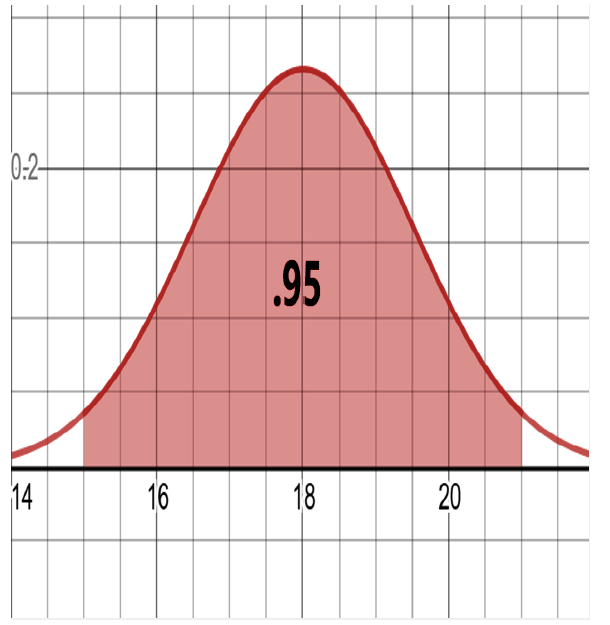

In [41]:
# Calculating the probability of recovery between 15 and 21 days
from scipy.stats import norm

# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# 95% probability recovery time takes between 15 and 21 days.
x = norm.cdf(21, mean, std_dev) - norm.cdf(15, mean, std_dev)

print(x) # 0.9544997361036416

0.9544997361036416


We can infer then from the remaining 5% probability that there’s a 2.5% chance of recovery taking longer than 21 days and a 2.5% chance of it taking fewer than 15 days. Hold onto that bit of information because it will be critical later! That drives our p-value.

Now let's consider experiment of new drugs on 40 people, which took an average of 16days for them to recover as shown 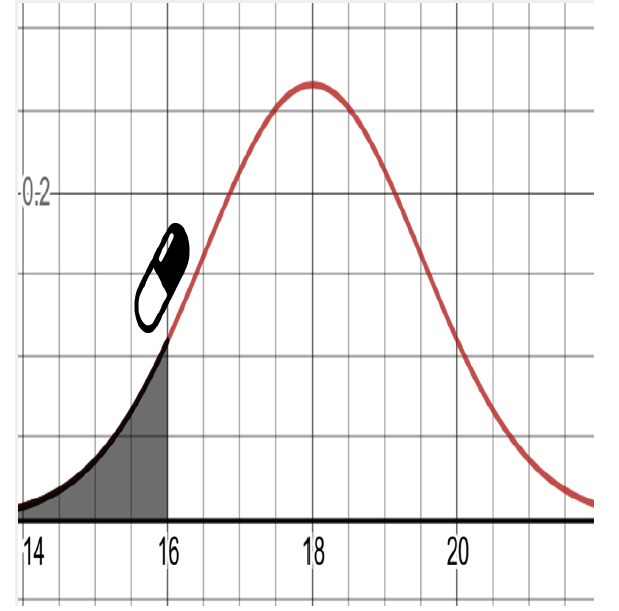

We will begin to question ourselves, did the drug have an impact???

This is similar to asking, does the drug show statistically significant result? or did the drug not work and the 16-day recovery was a coincidence wit test group?

These questions forms basis for hypothesis, the first frames our alternative hypothesis, while the second frames the null hypothesis.

There are two ways these can be calculated;

- one-tailed test
- two-tailed test

* One-Tailed Test

When we approach the one-tailed test, we typically frame our null and alternative hypotheses using inequalities. We hypothesize around the population mean and say that it either is greater than/equal to 18 (the null hypothesis H0) or less than 18 (the alternative hypothesis H1):
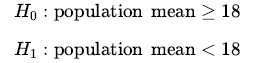

To reject our null hypothesis, we need to show that our sample mean of the patients who took the drug is not likely to have been coincidental.

* Two-Tailed Test

The previous test we performed is called the one-tailed test because it looks for
statistical significance only on one tail. However, it is often safer and better
practice to use a two-tailed test. We will elaborate why, but first let’s calculate it.


To do a two-tailed test, we frame our null and alternative hypothesis in an “equal”
and “not equal” structure. In our drug test, we will say the null hypothesis has a
mean recovery time of 18 days. But our alternative hypothesis is the mean
recovery time is not 18 days, thanks to the new drug:
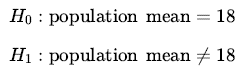

This has an important implication. We are structuring our alternative hypothesis to not test whether the drug improves cold recovery time, but if it had any impact. This includes testing if it increased the duration of the cold. Is this helpful? Hold that thought.

# Exercise
1. You bought a spool of 1.75 mm filament for your 3D printer. You want to
measure how close the filament diameter really is to 1.75 mm. You use a
caliper tool and sample the diameter five times on the spool:
1.78, 1.75, 1.72, 1.74, 1.77
Calculate the mean and standard deviation for this set of values.
2. A manufacturer says the Z-Phone smart phone has a mean consumer life of
42 months with a standard deviation of 8 months. Assuming a normal
distribution, what is the probability a given random Z-Phone will last
between 20 and 30 months?
3. I am skeptical that my 3D printer filament is not 1.75 mm in average
diameter as advertised. I sampled 34 measurements with my tool. The
sample mean is 1.715588 and the sample standard deviation is 0.029252.
What is the 99% confidence interval for the mean of my entire spool of
filament?